#Import all the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Problem Statement

In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two variables  of the Ice Cream Shop and then predict the revenue for the ice cream shop based on the temperature on a particular day.

#Import Dataset

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [4]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature v/s Revenue')

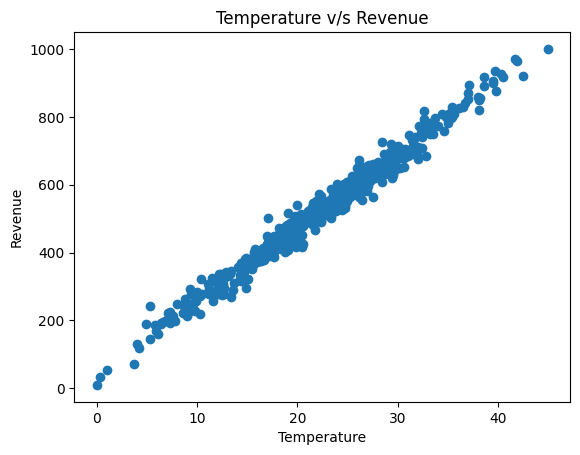

In [9]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

<Axes: >

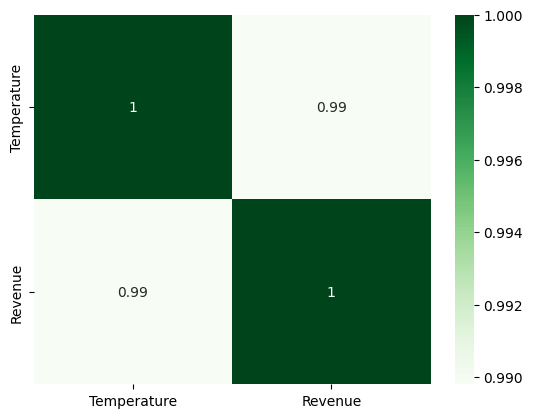

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

<Axes: >

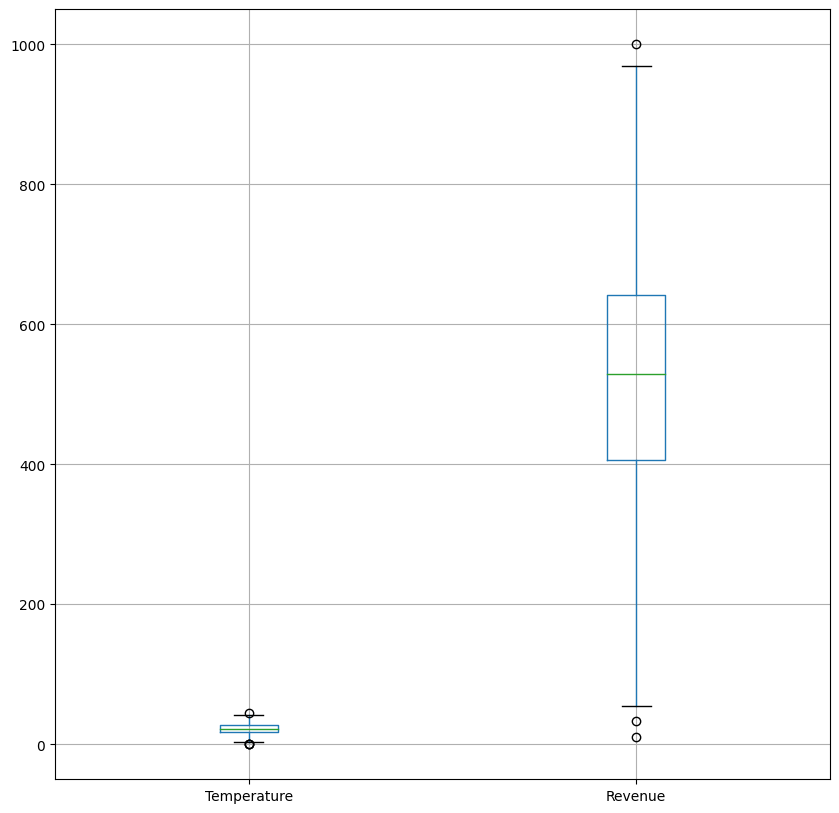

In [15]:
plt.figure(figsize=(10,10))
df.boxplot()

# Splitting of data - Training & Testing set

In [16]:
x = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
len(x_train)

400

In [19]:
len(y_train)

400

In [20]:
len(x_test)

100

In [21]:
len(y_test)

100

#Choosing the model

In [22]:
regressor = DecisionTreeRegressor()

#Training the model

In [24]:
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

#Testing the model

In [25]:
x_test

array([14.73955066, 20.89871624, 21.02639814,  9.07383825, 34.47216919,
       19.26778542, 23.05621357,  5.30750735, 19.81463838, 23.38514451,
       30.6353071 , 24.47243216, 24.30829573, 31.22898848, 30.66659556,
       32.29733128, 18.4750345 , 26.96421749, 25.54596553, 36.56911506,
        8.99176011, 25.05628082, 16.25872074, 19.97746731, 27.72739922,
       18.88371892,  6.39383463, 28.29868977, 17.13279538,  9.65149525,
       30.42779184, 28.64919191, 20.55667911, 31.66848495, 23.57711325,
        9.81251047, 19.43326763, 28.86558895, 28.82975908, 25.19142452,
       24.54855656, 28.33536277, 32.80503252, 28.72991474, 30.33033167,
       10.09664458, 28.2717647 , 12.18941793, 19.72807749, 26.9567197 ,
       23.98464085, 20.24414985, 31.03033279, 23.07061587, 25.42216523,
       25.99599345, 39.76412854, 18.77682968, 24.62861149, 26.36974685,
       22.27489926, 14.36142415, 23.08766377, 21.6018917 , 25.3804373 ,
       22.38760374, 12.44265041, 29.12912778, 38.18519935,  8.58

In [26]:
y_test

array([381.8030138, 508.7204715, 521.7754452, 222.8723171, 809.3525195,
       486.4749845, 552.8193512, 242.5098553, 471.7015569, 506.4321353,
       651.8615363, 596.8767502, 594.3116748, 697.8339862, 680.0271205,
       751.0545702, 427.2113597, 581.0740052, 591.1733898, 827.6848313,
       250.1317278, 583.8552306, 374.231135 , 468.9751034, 651.5043041,
       444.8268017, 190.7109408, 639.5380115, 412.082357 , 274.6789209,
       704.2814391, 689.8516908, 477.8417185, 733.215828 , 570.9909316,
       258.2868099, 448.4713348, 662.5589903, 682.8085663, 575.176896 ,
       531.7424848, 632.901914 , 685.6546554, 631.3182368, 691.9580059,
       272.8570213, 625.8046425, 335.770416 , 456.524341 , 643.6486011,
       559.1358692, 498.2521461, 684.1584437, 543.5995933, 608.9363452,
       570.5778753, 935.7172907, 402.3984607, 603.3053386, 609.4174787,
       524.7463643, 315.6465807, 536.2081816, 545.9039291, 603.3246306,
       493.1154676, 274.0656189, 652.0054081, 856.3033039, 221.2

In [30]:
y_pred = regressor.predict(x_test.reshape(-1,1))

In [31]:
y_pred

array([322.9839774, 491.2306027, 503.0842679, 291.7230401, 756.9625616,
       452.6263171, 539.6880057, 145.6253019, 496.0112948, 553.1196514,
       702.9017171, 526.5470649, 572.6720474, 746.9463889, 702.9017171,
       747.9632701, 469.9090332, 618.1720908, 579.3073878, 841.1714271,
       264.123914 , 550.7014036, 394.1686196, 541.2936627, 654.8949545,
       476.7945251, 191.6233119, 655.4339792, 441.5087331, 235.3646433,
       690.7892959, 666.1368355, 425.0120182, 737.8008241, 542.6080704,
       228.9010303, 429.4357021, 641.0253891, 641.0253891, 563.2509867,
       534.7990284, 655.4339792, 755.8183987, 651.1862423, 690.7892959,
       276.3733742, 655.4339792, 297.4991195, 448.9304429, 618.1720908,
       603.2329422, 437.2519927, 746.9463889, 539.6880057, 583.7597813,
       625.1901215, 875.0193476, 421.621505 , 603.0913818, 646.2669458,
       550.2785159, 367.9407438, 506.4937476, 537.6648006, 604.6266727,
       489.5690899, 279.866148 , 679.3177906, 850.2469822, 241.2

#Comparing the y_test with y_pred

In [32]:
comp = pd.DataFrame({"Actual Values":y_test.reshape(-1),
                     "Predicted Values":y_pred.reshape(-1)})

In [33]:
comp

,Actual Values,Predicted Values
0,381.803014,322.983977
1,508.720471,491.230603
2,521.775445,503.084268
3,222.872317,291.723040
4,809.352519,756.962562
...,...,...
95,379.318226,401.924792
96,702.623614,696.716640
97,654.197406,618.172091
98,809.672053,807.541287


Text(0, 0.5, 'y_test/y_pred')

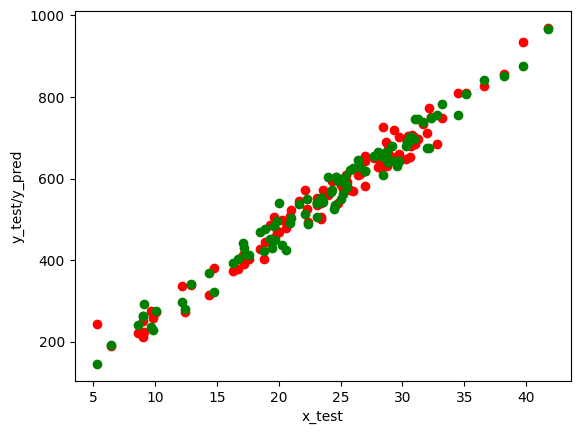

In [37]:
plt.scatter(x_test, y_test, color='red')
plt.scatter(x_test, y_pred, color='green')
plt.xlabel('x_test')
plt.ylabel('y_test/y_pred')

<Axes: >

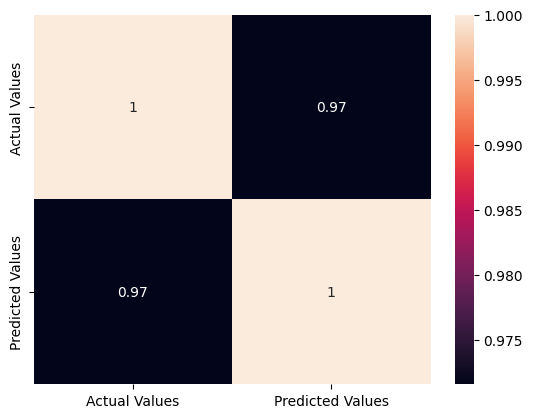

In [38]:
sns.heatmap(comp.corr(), annot=True)

<Axes: >

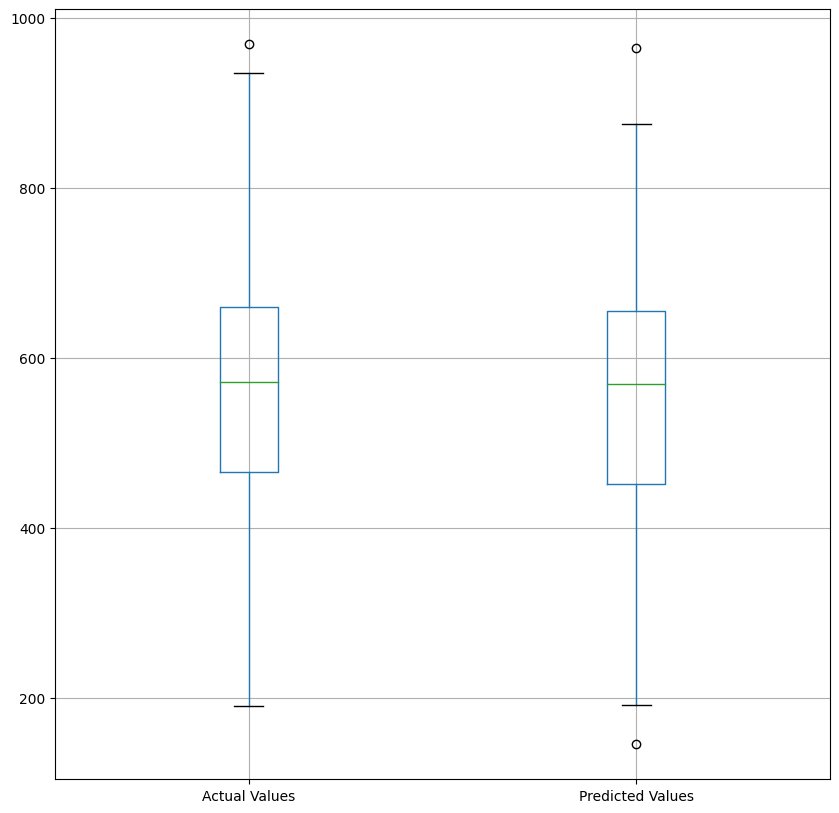

In [39]:
plt.figure(figsize=(10,10))
comp.boxplot()

# Performance

In [40]:
r2_score(y_test,y_pred)

0.9437181013958883

In [42]:
mean_squared_error(y_test,y_pred)

1486.3056002328126

In [41]:
mean_absolute_error(y_test,y_pred)

30.295372926999995

In [46]:
regressor.predict([[34]])

array([771.7895369])

#Importing the Dataset

In [47]:
df.to_csv("tempRevenue.csv")